# Outlier Detection -- Credit Card Fraud (Kaggle)

In this practical example, we consider a real credit card [dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud) from kaggle. 

## Investigate the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import LocalOutlierFactor

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
creditcard_data1 = pd.read_csv("datasets/creditcard-1.csv")
creditcard_data2 = pd.read_csv("datasets/creditcard-2.csv")
creditcard_data = creditcard_data1.append(creditcard_data2)
creditcard_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
142399,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
142400,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
142401,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
142402,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
142403,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [3]:
creditcard_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Excursion: Freature Engineering - Principal Component Analysis (PCA)

##### Check for missing data

In [4]:
creditcard_data.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

##### Check distribuition of classes

In [5]:
creditcard_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### Excursion: Feature Engineering - Scaling the data

In [6]:
rob_scaler = RobustScaler()

scaled_amount = rob_scaler.fit_transform(creditcard_data['Amount'].values.reshape(-1,1))
scaled_time = rob_scaler.fit_transform(creditcard_data['Time'].values.reshape(-1,1))

creditcard_data.drop(['Time','Amount'], axis=1, inplace=True)
creditcard_data.insert(0, 'scaled_amount', scaled_amount)
creditcard_data.insert(1, 'scaled_time', scaled_time)

creditcard_data.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Q: Is there a problem with this approach?

## Explore the data set

##### Check Feature Distribution

In [7]:
creditcard_data.dtypes

scaled_amount    float64
scaled_time      float64
V1               float64
V2               float64
V3               float64
V4               float64
V5               float64
V6               float64
V7               float64
V8               float64
V9               float64
V10              float64
V11              float64
V12              float64
V13              float64
V14              float64
V15              float64
V16              float64
V17              float64
V18              float64
V19              float64
V20              float64
V21              float64
V22              float64
V23              float64
V24              float64
V25              float64
V26              float64
V27              float64
V28              float64
Class              int64
dtype: object

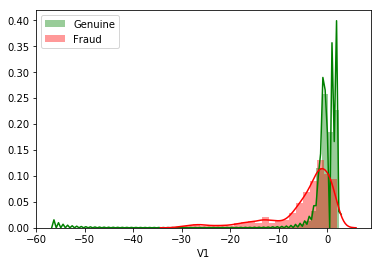

In [8]:
sns.distplot(creditcard_data['V1'][creditcard_data['Class']==0],color='g',label='Genuine')
sns.distplot(creditcard_data['V1'][creditcard_data['Class']==1],color='r',label='Fraud')
plt.legend()
plt.show()

##### Check Correlation Matrics

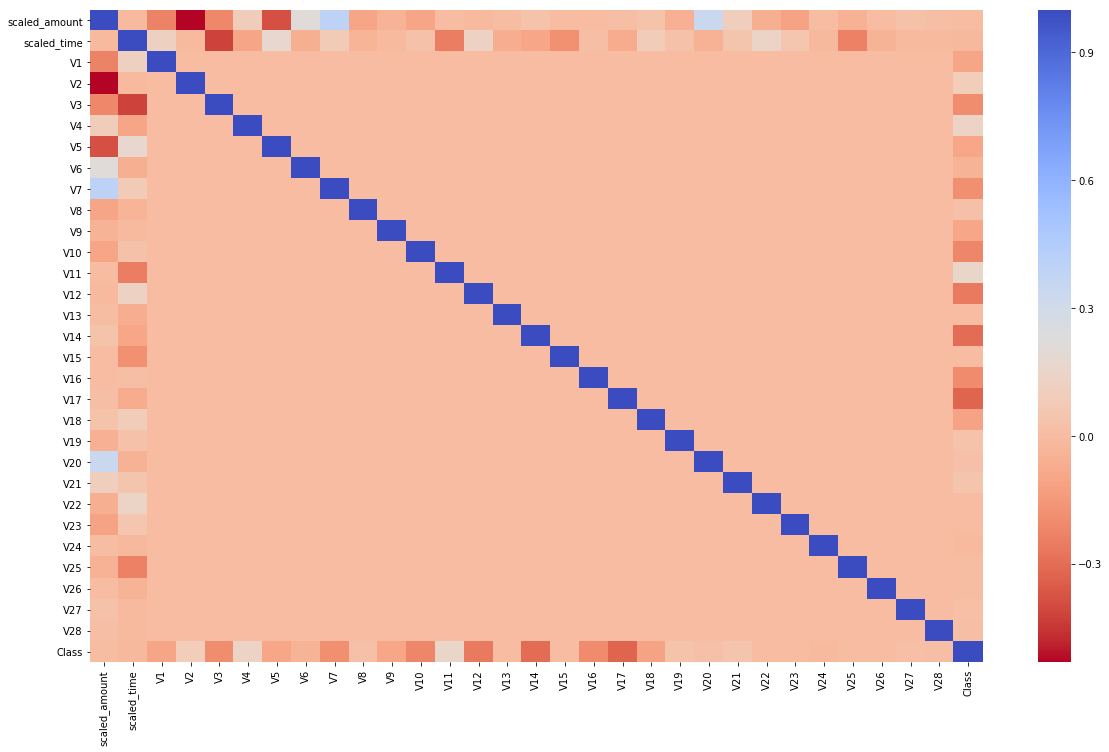

In [9]:
plt.figure(1, figsize=(20, 12))
corr_mat = creditcard_data.corr()
sns.heatmap(corr_mat, cmap='coolwarm_r', annot_kws={'size':20})
plt.show()

## Caution: Split a test set BEFORE doing anything!


In [10]:
X_all = creditcard_data.drop('Class', axis=1)
Y_all = creditcard_data["Class"]

X_train,X_test,Y_train,Y_test = train_test_split(X_all, Y_all, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(227845, 30)
(56962, 30)


### Q: Is there a problem with this approach?

In [11]:
num_outliers_train = Y_train.count()
num_outliers_test = Y_test.count()

print("Outlier Distribution:")
print("Train: ", Y_train.sum()/Y_train.count())
print("Test: ", Y_test.sum()/Y_test.count())

Outlier Distribution:
Train:  0.0017819131427066646
Test:  0.0015097784487904217


In [12]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_index, test_index in sss.split(X_all, Y_all):
    X_train, X_test = X_all.iloc[train_index], X_all.iloc[test_index]
    Y_train, Y_test = Y_all.iloc[train_index], Y_all.iloc[test_index]

In [13]:
num_outliers_train = Y_train.count()
num_outliers_test = Y_test.count()

print("Outlier Distribution:")
print("Train: ", Y_train.sum()/Y_train.count())
print("Test: ", Y_test.sum()/Y_test.count())

Outlier Distribution:
Train:  0.001729245759178389
Test:  0.0017204452090867595


## Feature Selection

In [14]:
creditcard_train = pd.concat([X_train, Y_train], axis=1)

In [15]:
creditcard_train['Class'].value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [16]:
creditcard_train.shape

(227845, 31)

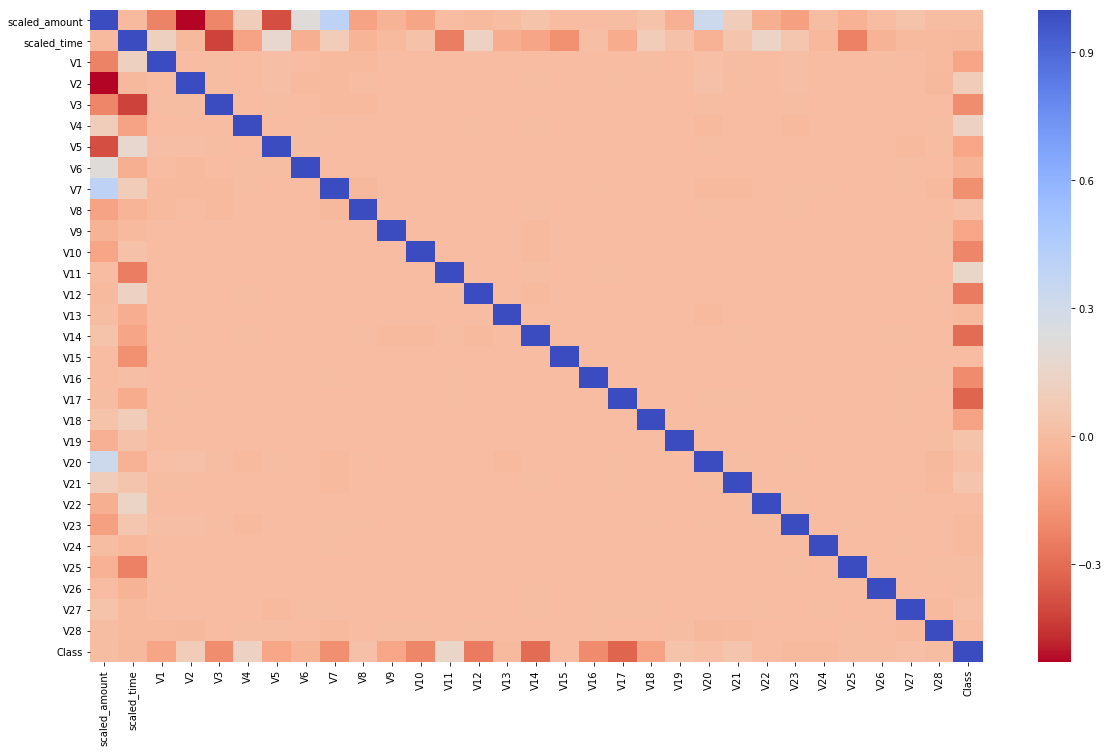

In [17]:
plt.figure(1, figsize=(20, 12))
corr_mat = creditcard_train.corr()
sns.heatmap(corr_mat, cmap='coolwarm_r', annot_kws={'size':20})
plt.show()

In [18]:
X_sub_train = creditcard_train[['V2','V3','V7','V10','V11','V12','V14','V16','V17']]
Y_train = creditcard_train["Class"]

X_sub_test = X_test[['V2','V3','V7','V10','V11','V12','V14','V16','V17']]

In [19]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_sub_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [20]:
frst_clf = IsolationForest()
frst_clf.fit(X_sub_train)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [21]:
log_clf = LogisticRegression()
log_clf.fit(X_sub_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
y_pred_knn = knn_clf.predict(X_sub_test)

In [23]:
y_pred_frst = frst_clf.predict(X_sub_test)
y_pred_frst[y_pred_frst>0] = 0
y_pred_frst[y_pred_frst<0] = 1

In [24]:
y_pred_log = log_clf.predict(X_sub_test)

In [25]:
print("k-nearest neighbor:")
print(classification_report(Y_test, y_pred_knn, digits=4))
print("IsolationForest:")
print(classification_report(Y_test, y_pred_frst, digits=4))
print("LogisticRegression:")
print(classification_report(Y_test, y_pred_log, digits=4))

k-nearest neighbor:
             precision    recall  f1-score   support

          0     0.9996    0.9999    0.9998     56864
          1     0.9620    0.7755    0.8588        98

avg / total     0.9995    0.9996    0.9995     56962

IsolationForest:
             precision    recall  f1-score   support

          0     0.9997    0.9020    0.9483     56864
          1     0.0150    0.8673    0.0295        98

avg / total     0.9981    0.9019    0.9468     56962

LogisticRegression:
             precision    recall  f1-score   support

          0     0.9995    0.9998    0.9997     56864
          1     0.8734    0.7041    0.7797        98

avg / total     0.9993    0.9993    0.9993     56962



In [26]:
def get_confmat(y_test, y_pred):
    cnf_mat = confusion_matrix(y_test, y_pred)
    row_sum = cnf_mat.sum(axis=1,keepdims=True)
    return cnf_mat / row_sum
    

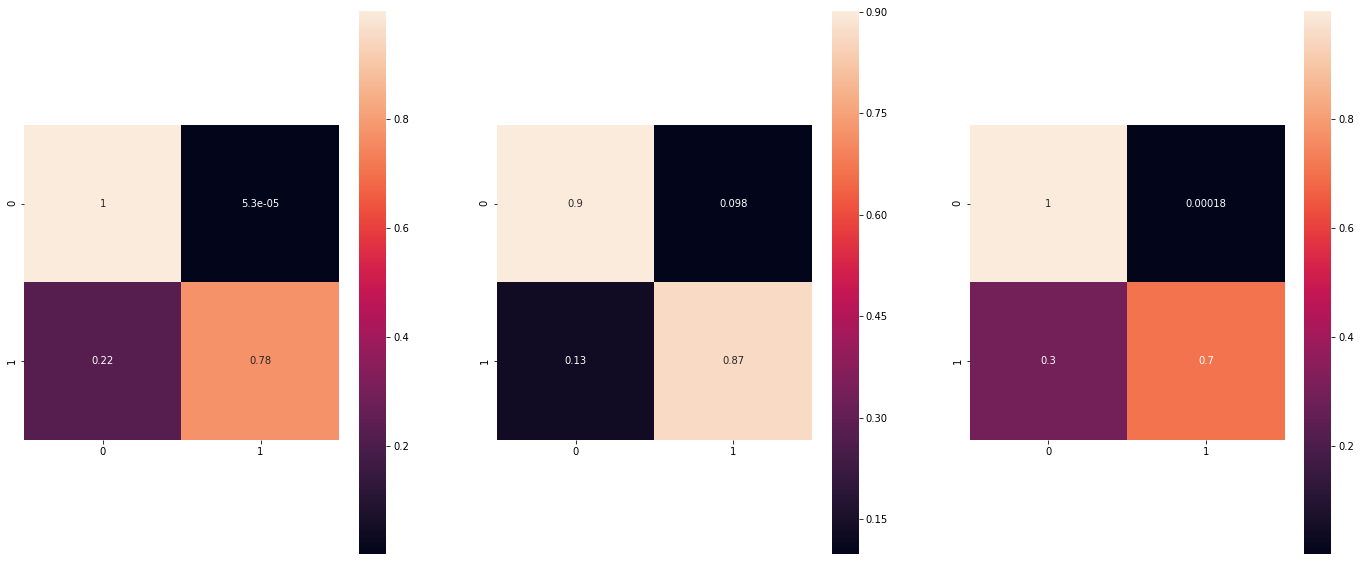

In [27]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,10))

sns.heatmap(get_confmat(Y_test, y_pred_knn), square=True, annot=True, ax = ax1)
sns.heatmap(get_confmat(Y_test, y_pred_frst), square=True, annot=True, ax = ax2)
sns.heatmap(get_confmat(Y_test, y_pred_log), square=True, annot=True, ax = ax3)

plt.show()

### Q: Are we happy with these results?

## Undersampling

In [28]:
df = creditcard_train.sample(frac=1)
creditcard_train['Class'].value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [29]:
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:394]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
balanced_creditcard_train = normal_distributed_df.sample(frac=1)

balanced_creditcard_train.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
41395,-0.293440,-0.517276,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,...,-0.108006,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1
1893,-0.265493,0.015484,-2.555566,-0.660807,1.341329,-2.198762,-0.617224,-1.074971,-1.124080,1.093843,...,-0.302701,0.316659,0.454347,-0.576529,0.137053,0.375576,-0.010467,-0.234221,-0.308952,0
95152,0.598058,0.758973,-1.119339,1.141583,-0.775931,-0.518364,-0.856803,-0.674489,-0.090370,0.694668,...,0.077495,0.222888,1.074744,-0.316043,0.059284,0.187555,1.174837,0.080662,0.004252,0
141258,-0.307413,-0.005733,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,...,1.129532,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,1
106861,-0.282540,-0.170714,1.149913,0.178701,0.602460,0.597550,-0.248116,-0.233986,-0.071790,0.038646,...,-0.153311,-0.177049,-0.433230,0.234758,0.096443,0.033760,0.132707,0.006071,0.016063,0


In [30]:
balanced_creditcard_train['Class'].value_counts()

1    394
0    394
Name: Class, dtype: int64

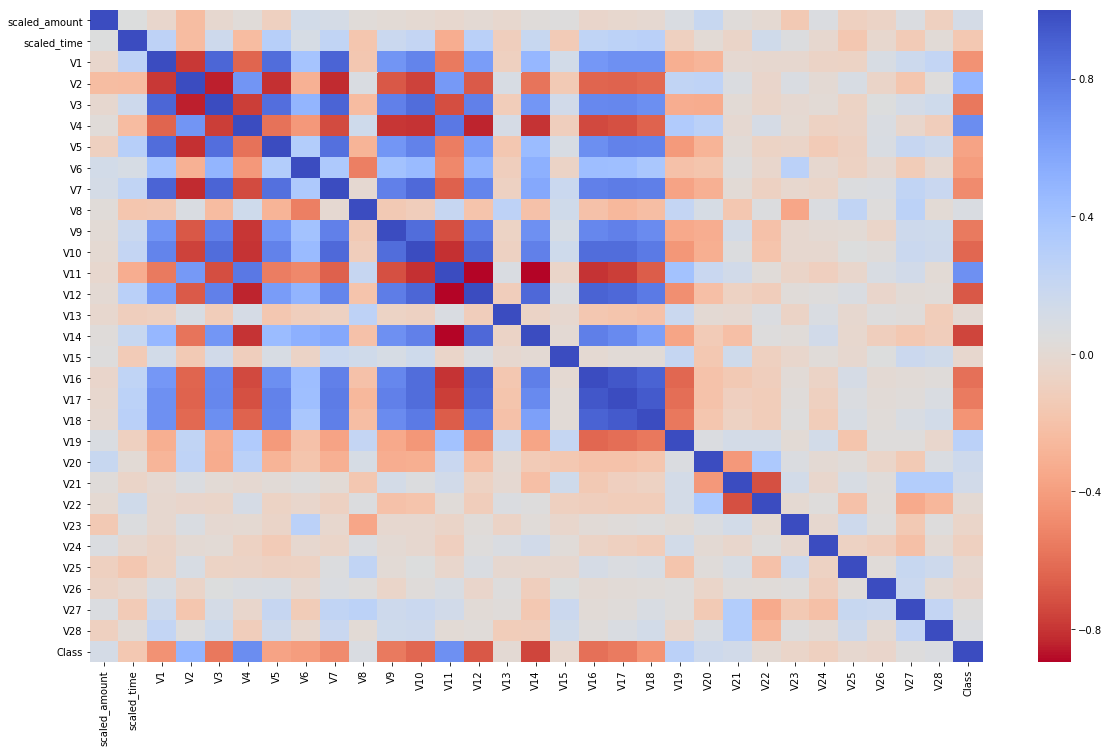

In [31]:
plt.figure(2, figsize=(20, 12))
corr_mat = balanced_creditcard_train.corr()
sns.heatmap(corr_mat, cmap='coolwarm_r', annot_kws={'size':20})
plt.show()

In [32]:
X_bal_train = balanced_creditcard_train[['V2','V3','V4','V10','V11','V12','V14','V16','V17']]
Y_bal_train = balanced_creditcard_train["Class"]

X_bal_test = X_test[['V2','V3','V4','V10','V11','V12','V14','V16','V17']]

In [33]:
knn_bal_clf = KNeighborsClassifier(n_neighbors=3)
knn_bal_clf.fit(X_bal_train, Y_bal_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [34]:
frst_bal_clf = IsolationForest()
frst_bal_clf.fit(X_bal_train)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [35]:
log_bal_clf = LogisticRegression()
log_bal_clf.fit(X_bal_train, Y_bal_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
y_bal_pred_knn = knn_clf.predict(X_bal_test)
y_bal_pred_log = log_clf.predict(X_bal_test)

y_bal_pred_frst = frst_clf.predict(X_bal_test)
y_bal_pred_frst[y_bal_pred_frst>0] = 0
y_bal_pred_frst[y_bal_pred_frst<0] = 1

In [37]:
print("k-nearest neighbor:")
print(classification_report(Y_test, y_bal_pred_knn))
print("IsolationForest:")
print(classification_report(Y_test, y_bal_pred_frst))
print("LogisticRegression:")
print(classification_report(Y_test, y_bal_pred_log))

k-nearest neighbor:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56864
          1       0.85      0.67      0.75        98

avg / total       1.00      1.00      1.00     56962

IsolationForest:
             precision    recall  f1-score   support

          0       1.00      0.88      0.93     56864
          1       0.01      0.90      0.02        98

avg / total       1.00      0.88      0.93     56962

LogisticRegression:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56864
          1       0.87      0.68      0.77        98

avg / total       1.00      1.00      1.00     56962



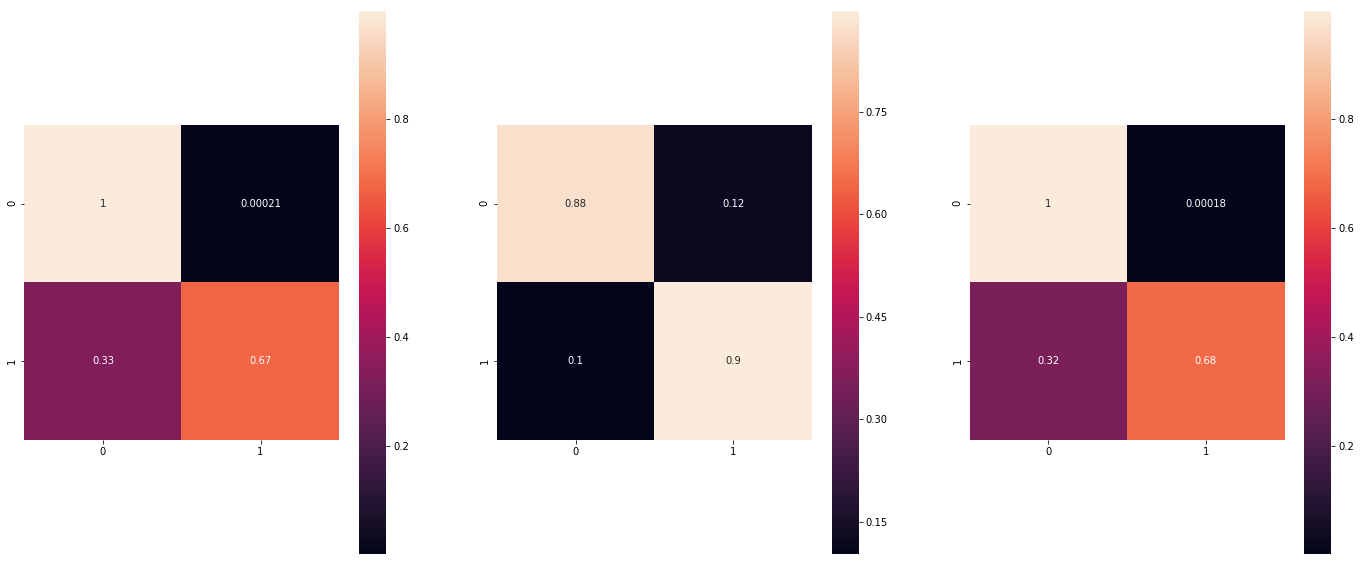

In [38]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,10))

sns.heatmap(get_confmat(Y_test, y_bal_pred_knn), square=True, annot=True, ax = ax1)
sns.heatmap(get_confmat(Y_test, y_bal_pred_frst), square=True, annot=True, ax = ax2)
sns.heatmap(get_confmat(Y_test, y_bal_pred_log), square=True, annot=True, ax = ax3)

plt.show()

## Additional Tests

In [39]:
clf_outFac = LocalOutlierFactor(n_neighbors=100)

y_outFac_pred = clf_outFac.fit_predict(X_sub_test)
y_outFac_pred[y_outFac_pred>0] = 0
y_outFac_pred[y_outFac_pred<0] = 1

In [40]:
print(classification_report(Y_test, y_outFac_pred, digits=4))

             precision    recall  f1-score   support

          0     0.9997    0.9013    0.9480     56864
          1     0.0149    0.8673    0.0293        98

avg / total     0.9981    0.9012    0.9464     56962



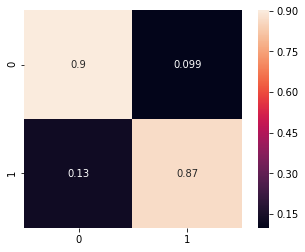

In [41]:
sns.heatmap(get_confmat(Y_test, y_outFac_pred), square=True, annot=True)
plt.show()